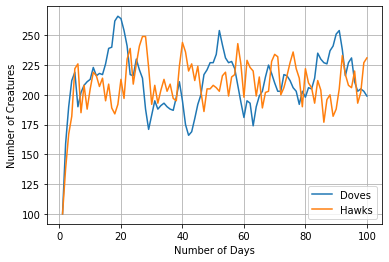

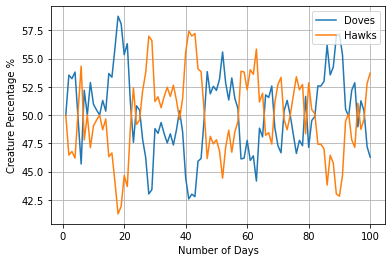

In [79]:
import random
import matplotlib.pyplot as plt

class Creature():
    def __init__(self , species , species_number):
        self.points = 0
        self.species = species
        self.num = species_number
    def encounter(self , other):
        global reward_table
        self.points += reward_table[self.num][other.num]
        other.points += reward_table[other.num][self.num]

def random_assign_creatures_to_trees(m):
    global creatures
    
    # Shuffle the creatures to randomize their order
    random.shuffle(creatures)
    
    # Initialize the trees with empty slots
    trees = [[] for _ in range(m)]
    
    # Randomly assign creatures to trees
    for creature in creatures:
        # Select a random tree that has fewer than 2 creatures
        available_trees = [tree for tree in trees if len(tree) < 2]
        if available_trees:
            random.choice(available_trees).append(creature)
    
    return trees

def breed_and_survive(creature):

    global copy_creatures 
    #creature dies
    if creature.points == 0:
        copy_creatures.remove(creature)

    #50 percent chance of death for creature    
    elif creature.points == 0.5 and random.randint(0,1) == 0:
        copy_creatures.remove(creature)

    #50 percent chance of reproduction for creature
    elif creature.points == 1.5 and random.randint(0,1) == 0:
        copy_creatures.append(Creature(creature.species , creature.num))

    #creature live and reproduces
    elif creature.points == 2:
        copy_creatures.append(Creature(creature.species , creature.num))

    creature.points = 0
        
def rewards(trees):
    for tree in trees:
        if len(tree) == 1:
            tree[0].points += 2
        if len(tree) == 2:
            tree[0].encounter(tree[1])

#count the number of hawks and doves and save them for future representation
def count_and_save():
    global creatures
    Dove_num = 0
    Hawk_num = 0
    Dove_perc = 0
    Hawk_perc = 0
    for creature in creatures:
        if creature.species == "Dove":
            Dove_num += 1
        else :
            Hawk_num += 1
    all_num = len(creatures)
    Dove_perc = Dove_num/all_num*100
    Hawk_perc = Hawk_num/all_num*100
    return Dove_num,Hawk_num,Dove_perc,Hawk_perc


reward_table = [[1,0.5], [1.5,0]] # Dove , Hawk // Dove , Hawk

#create 1000 species 500 doves and 500 hawks
Doves = [Creature("Dove" , 0) for i in range(100)]
Hawks = [Creature("Hawk" , 1) for i in range(100)]
creatures = []
creatures.extend(Doves)
creatures.extend(Hawks)
random.shuffle(creatures)
num_trees = 300 #amount of trees
num_days = 100

number_of_Doves = []
number_of_Hawks = []
Percentage_of_Doves = []
Percentage_of_Hawks = []
days = [day for day in range(1, num_days+1)]
#main loop
for i in range(num_days):
    Dove_num,Hawk_num,Dove_perc,Hawk_perc = count_and_save()
    number_of_Doves.append(Dove_num)
    number_of_Hawks.append(Hawk_num)
    Percentage_of_Doves.append(Dove_perc)
    Percentage_of_Hawks.append(Hawk_perc)
    trees = random_assign_creatures_to_trees(num_trees)
    rewards(trees)
    copy_creatures = creatures.copy()
    for creature in creatures :
        breed_and_survive(creature)
    creatures = copy_creatures.copy()

# Plot
plt.figure()
plt.plot(days, number_of_Doves, label='Doves')
plt.plot(days, number_of_Hawks, label='Hawks')
plt.grid()
plt.xlabel("Number of Days")
plt.ylabel("Number of Creatures")
plt.legend()
plt.show()

plt.figure()
plt.plot(days, Percentage_of_Doves, label='Doves')
plt.plot(days, Percentage_of_Hawks, label='Hawks')
plt.grid()
plt.xlabel("Number of Days")
plt.ylabel("Creature Percentage %")
plt.legend()
plt.show()